## TOKENBYTE

#### 0.0 import libraries

In [1]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from token_query import query


from polynomial_approximation import *

warnings.filterwarnings("ignore")

#### 1.0 Take Data

In [2]:
# User input 

address = input("Please enter the underlying Token which will be locked into the veContract: ") #0xC128a9954e6c874eA3d62ce62B468bA073093F25  #veBAL
tokenAddress = input("Please enter the veContractToken: ") #0x5c6Ee304399DBdB9C8Ef030aB642B10820DB8F56  # 80BAL-20WETH
api_key = input("Please enter you Airstack API key: ") #f9fc568933364afd940234a3b35da353

In [5]:
# User queries data
df = query(address, tokenAddress, api_key)

In [22]:
# format output 
stake = df[['rounded_timestamp','amount']].groupby('rounded_timestamp')['amount'].sum()
stake_daily = np.cumsum(stake) + np.max(stake)

price_daily = df[['rounded_timestamp','price_usd']].set_index('rounded_timestamp')['price_usd']

In [8]:
# # Now we will use the local test data
# staked = pd.read_csv('test_data/network-stake-per-day.csv')
# price = pd.read_csv('test_data/network-ccd-coingecko.csv')

In [13]:
# # Small data preparation of setting the time column and
# # taking the same time period
# staked['t'] = pd.to_datetime(staked['date'])
# stake_daily = staked[staked.t > '2022-02-10'].set_index('t').resample('D').sum()['staked_amount']

# price['t'] = pd.to_datetime(price['date'])
# price_daily = price.set_index('t')['ccd_usd']

#### 1.1 Plotting the data

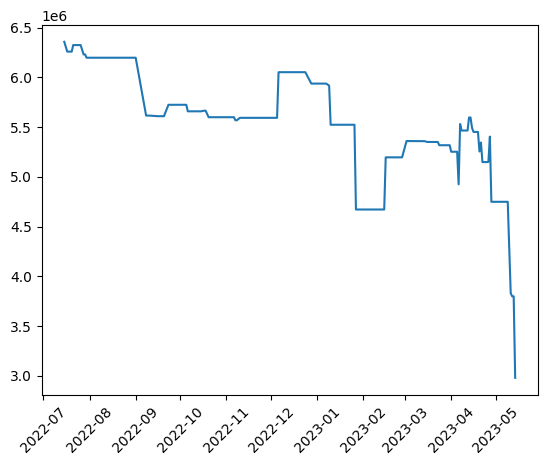

In [28]:
# Staking plot
plt.plot(stake_daily)
plt.xticks(rotation = 45)
plt.show()

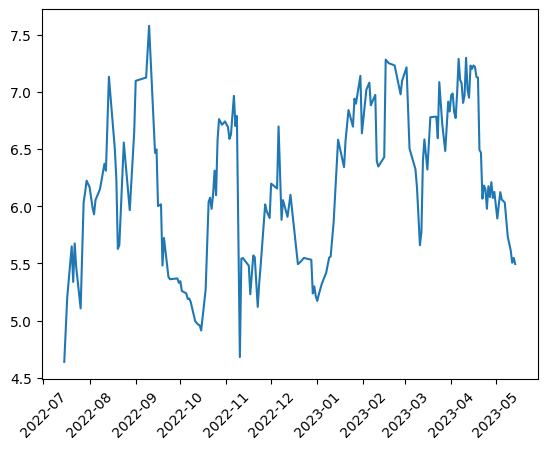

In [29]:
# Price plot
plt.plot(price_daily)
plt.xticks(rotation = 45)
plt.show()

#### 2.0 Polynomial Convergences

In [30]:
# Find the polynomial convergences of both staking and price value data
s_func, s_array = fit_polynomial_function(stake_daily, 25)
p_func, p_array = fit_polynomial_function(price_daily, 25)

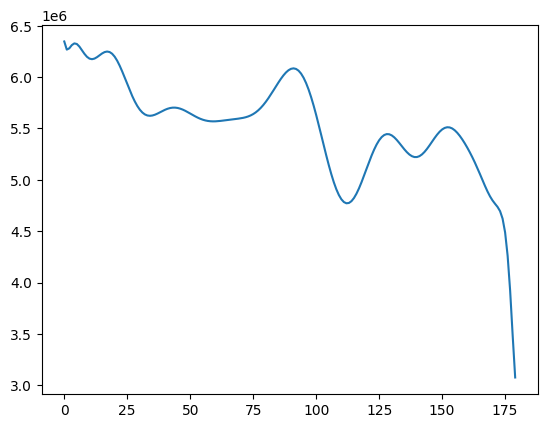

In [31]:
# plot new functions
plt.plot(s_array)

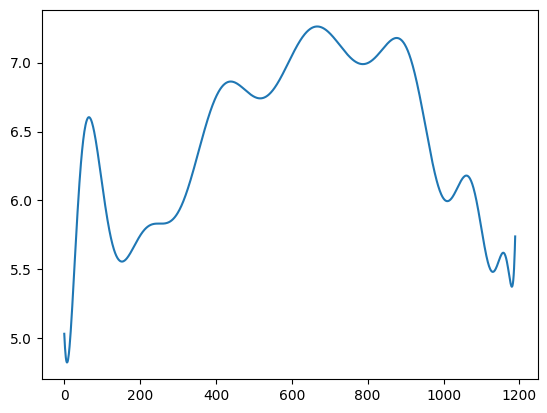

In [32]:
plt.plot(p_array)

In [33]:
# Correlation of these two functions
stats = correlation_stats_of_dists(s_func, p_func)

Now, we have the statistical compenents to converge to other function by using one of their estimation.    

#### 3.0 Defining the reward mechanisms

In this demo we will try different patterns of rewarding systems.    
1. Decreasing over time
2. Increasing over time
3. Increasing until the max point and starts to decrease

To make it even easier you can just enter numbers

In [34]:
case_1 = [1.75, 1.5, 1.3]
case_2 = [1.15, 1.3, 1.5, 1.75]
case_3 = [1.15, 1.3, 1.5, 1.3, 1.15]

We will functionize these patterns.    
With the assumption of staking pattern will be correlated with these functions,   
We will use the isolated statistics between real world staking-price relation   
And will come up new value-related functions of these stake-related functions.   

In [35]:
# Functionilize the cases
case_1_f, case_1_a = fit_polynomial_function(np.array(case_1)/len(case_1), 2)
case_2_f, case_2_a = fit_polynomial_function(np.array(case_2)/len(case_2), 2)
case_3_f, case_3_a = fit_polynomial_function(np.array(case_3)/len(case_3), 2)

#### 4.0 Estimating the value-related function

In [36]:
case_1_approx = approximate_function(case_1_f, stats)
case_2_approx = approximate_function(case_2_f, stats)
case_3_approx = approximate_function(case_3_f, stats)


Plot these three cases value-related approximation for same length data points.   
And calculate the area under the curve metrics of each case.

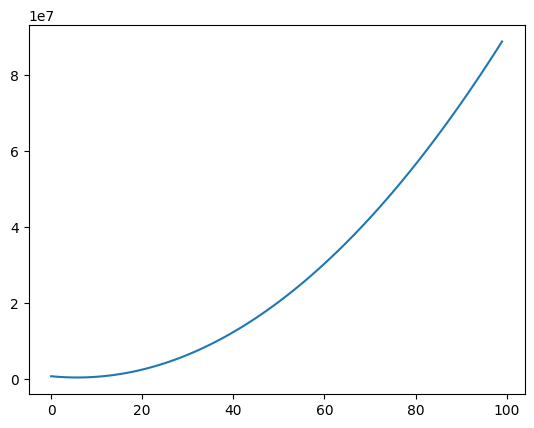

In [37]:
plt.plot(case_1_approx(range(100)))
plt.show()

In [38]:
auc_1 = np.trapz(case_1_approx(range(10)), dx=1)

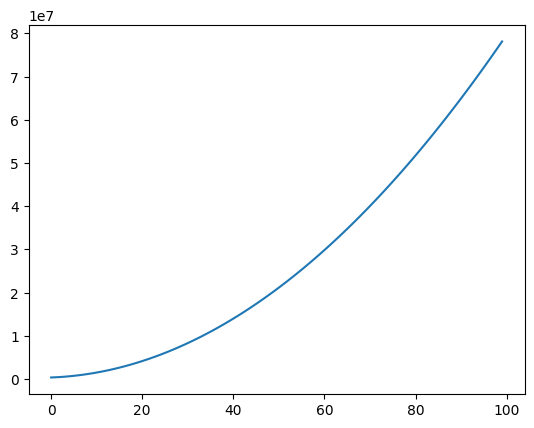

In [39]:
plt.plot(case_2_approx(range(100)))
plt.show()

In [40]:
auc_2 = np.trapz(case_2_approx(range(10)), dx=1)

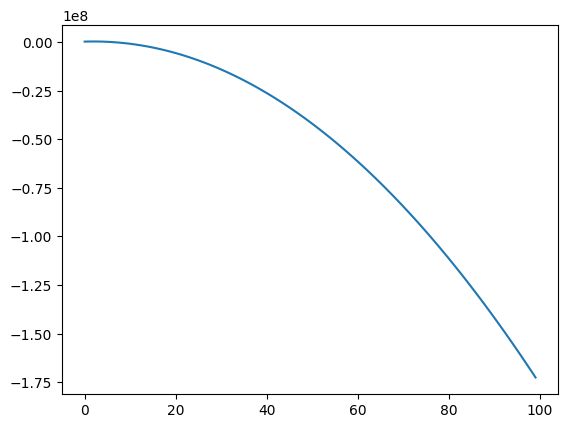

In [41]:
plt.plot(case_3_approx(range(100)))
plt.show()

In [42]:
auc_3 = np.trapz(case_3_approx(range(10)), dx=1)

In [43]:
results = {'case 1': auc_1,
           'case 2': auc_2,
           'case 3': auc_3}

In [44]:
# Sort based on the AUC metric
dict(sorted(results.items(), key=lambda item: item[1]))

{'case 3': 994384.4205980018,
 'case 1': 4408072.217619319,
 'case 2': 6686101.197594428}